<a href="https://colab.research.google.com/github/VenkataSunil18/NLP-G6/blob/main/dl_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 🎯Aim
To develop a CNN-based image classification system using a pre-trained ResNet-18 model in PyTorch.

#### ✅Objective:
 - Implement a deep learning-based image classification pipeline using PyTorch.
 - Load and preprocess an image to match the model’s input requirements.
 - Use a pre-trained ResNet-18 model to perform inference on an image.
 - Retrieve class labels from ImageNet to map the model’s output index to a human-readable category.
 - Run the classification in a Google Colab notebook, making it interactive and easy to use.
 - Provide real-time predictions on user-input images using publicly available datasets or custom images.
 - Display the predicted class.

#### 1️⃣ Import Required Libraries
* torch: PyTorch library for deep learning.
* torchvision.models: Provides pre-trained deep learning models.
* torchvision.transforms: Helps in preprocessing images for neural networks.
* PIL (Pillow): Used to load and manipulate images.
* requests: Fetches images and labels from the web.

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from IPython.display import display
import requests

####2️⃣ Load a Pre-trained ResNet Model
* models.resnet18(pretrained=True): Loads a pre-trained ResNet-18 model trained on ImageNet.
* model.eval(): Sets the model to evaluation mode, disabling features like dropout and batch normalization updates.

In [ ]:
model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
model.eval();

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


#### 3️⃣ Define Image Preprocessing
* Resize: Rescales the image to match the input size of ResNet.
* ToTensor: Converts an image into a PyTorch tensor.
* Normalize: Adjusts pixel values to match ImageNet-trained model expectations.

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#### 4️⃣ Load an Image from URL
* requests.get(image_url, stream=True).raw: Downloads the image from the internet.
* Image.open(): Opens the image using PIL.
* transform(image): Applies preprocessing transformations.
* unsqueeze(0): Adds a batch dimension, converting (C, H, W) → (1, C, H, W).

In [ ]:
#image_url = "https://gardeningsg.nparks.gov.sg/images/Plants/custardapple%20boo%20chih%20min_%20fruit_ffw.jpg"
#image_url = "https://m.media-amazon.com/images/S/assets.wholefoodsmarket.com/PIE/product/580a7ef428c87b4137c70f24_produce-freshvegetables-pomegranate-0785._FMwebp__SR600,600_.jpg"
#image_url = "https://5.imimg.com/data5/SELLER/Default/2024/1/373538892/FZ/BH/CA/200287563/a-grade-fresh-yellow-banana.jpg"
image_url = "https://sahajakrishi.in/wp-content/uploads/2020/12/p11.jpg"

image = Image.open(requests.get(image_url, stream=True).raw)
input_tensor = transform(image).unsqueeze(0)

#### 5️⃣ Perform Inference (Prediction)
* torch.no_grad(): Disables gradient computation (faster inference).
* model(input_tensor): Runs the image through ResNet and gets the output tensor.
* torch.argmax(output[0]).item(): Finds the index of the highest probability class.

In [ ]:
with torch.no_grad():
    output = model(input_tensor)
    predicted_class_index = torch.argmax(output[0]).item()

#### 6️⃣ Load Class Labels
* Fetches ImageNet class labels from an online text file.
* splitlines(): Converts the text into a list of class names(1,000).
* labels[predicted_class_index]: Maps the predicted index to the actual class name.

In [ ]:
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(LABELS_URL).text.splitlines()
predicted_class = labels[predicted_class_index]

####7️⃣ Display the Predicted Class

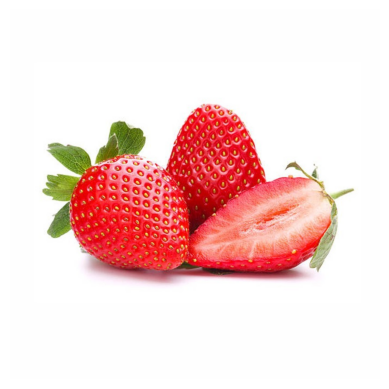

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def show_image_from_url(url):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        image = Image.open(BytesIO(response.content))

        # Display the image using matplotlib
        plt.imshow(image)
        plt.axis('off')  # Hide axes ticks and labels
        plt.show()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")
    except Exception as e:
       print(f"Error processing image: {e}")
show_image_from_url(image_url)

In [ ]:
print(f"Predicted Class: {predicted_class}")

Predicted Class: strawberry


#### 📝 Summary

1. Import Required Libraries.
2. Loads a ResNet model trained on ImageNet.
3. Preprocesses an image (resize, tensor conversion, normalization).
4. Fetches and processes an image from a URL.
5. Passes the image through the model to get predictions.
6. Maps the predicted index to a human-readable label.
7. Displays the predicted class.